In [8]:
__author__="Atalay Samet Ergen"
"""
In number theory, Sylvester's sequence is an integer sequence in which each member of the sequence is
the product of the previous members, plus one. The first few terms of the sequence are:
2, 3, 7, 43, 1807, 3263443, 10650056950807, 113423713055421844361000443 (sequence A000058 in the OEIS).
Reference: https://en.wikipedia.org/wiki/Sylvester%27s_sequence
"""
def sylvelsterSequence(n):
    product = 1
    for i in range(n):
        product *= sylvelsterSequence(i)
    return product + 1

print(sylvelsterSequence(9))

165506647324519964198468195444439180017513152706377497841851388766535868639572406808911988131737645185443


In [15]:
"""
Iterative implementation of Ackermann's function
by Ryan Wilson-Perkin
for CIS3190W15: Legacy Programming
"Great, kid. Don't get cocky." https://www.youtube.com/watch?v=nN9xsFUsPqM
"""
def ackermann(m, n):
    stack = []
    stack.append(m)
    while stack:
        m = stack.pop()
        if m == 0:
            n = n + 1
        elif n == 0:
            n = 1
            stack.append(m-1)
        else:
            n = n - 1
            stack.append(m-1)
            stack.append(m)
    return n
m, n = 3, 3
print(ackermann(m, n))

61


In [16]:
from turtle import *

SIZE  = 10 # (!) Try changing the line length by a litte.
ANGLE = 90 # (!) Try changing the turning angle by a litte.
LEVEL = 5  # (!) Try changing the recursive level by a litte.

bgcolor('#B20059')
pencolor('#FFE6F2')
fillcolor('#FFE6F2')

speed('fastest')
#tracer(1, 0) # (!) Try uncommenting this line to draw the shape faster.

penup()
goto(-320, 0)
pendown()

#setheading(20) # (!) Try uncommenting this line.

def hilbert_curve(level, angle):
    if level == 0:
        return

    right(angle)
    hilbert_curve(level - 1, -angle)
    forward(SIZE)
    left(angle)
    hilbert_curve(level - 1, angle)
    forward(SIZE)
    hilbert_curve(level - 1, angle)
    left(angle)
    forward(SIZE)
    hilbert_curve(level - 1, -angle)
    right(angle)

def filled_in_hilbert():
    begin_fill()
    hilbert_curve(LEVEL, ANGLE) # draw first quadrant
    forward(SIZE)

    hilbert_curve(LEVEL, ANGLE) # draw second quadrant
    left(ANGLE)
    forward(SIZE)
    left(ANGLE)

    hilbert_curve(LEVEL, ANGLE) # draw third quadrant
    forward(SIZE)

    hilbert_curve(LEVEL, ANGLE) # draw fourth quadrant
    left(ANGLE)
    forward(SIZE)
    left(ANGLE)
    end_fill()

filled_in_hilbert()
update()
exitonclick()

In [2]:
import turtle
turtle.tracer(10, 0) # Increase the first argument to speed up the drawing.
turtle.setworldcoordinates(0, 0, 700, 700)
turtle.hideturtle()

MIN_SIZE = 6 # Try changing this to decrease/increase the amount of recursion.
DRAW_SOLID = True

def isTooSmall(width, height):
    # Determine if the rectangle is too small to draw.
    return width < MIN_SIZE or height < MIN_SIZE

def drawCarpet(x, y, width, height):
    # The x and y are the lower left corner of the carpet.

    # Move the pen into position.
    turtle.penup()
    turtle.goto(x, y)

    # Draw the outer rectangle.
    turtle.pendown()
    if DRAW_SOLID:
        turtle.fillcolor('black')
        turtle.begin_fill()
    turtle.goto(x, y + height)
    turtle.goto(x + width, y + height)
    turtle.goto(x + width, y)
    turtle.goto(x, y)
    if DRAW_SOLID:
        turtle.end_fill()
    turtle.penup()

    # Draw the inner rectangles.
    drawInnerRectangle(x, y, width, height)

def drawInnerRectangle(x, y, width, height):
    if isTooSmall(width, height):
        # BASE CASE
        return
    else:
        # RECURSIVE CASE

        oneThirdWidth = width / 3
        oneThirdHeight = height / 3
        twoThirdsWidth = 2 * (width / 3)
        twoThirdsHeight = 2 * (height / 3)

        # Move into position.
        turtle.penup()
        turtle.goto(x + oneThirdWidth, y + oneThirdHeight)

        # Draw the inner rectangle.
        if DRAW_SOLID:
            turtle.fillcolor('white')
            turtle.begin_fill()
        turtle.pendown()
        turtle.goto(x + oneThirdWidth, y + twoThirdsHeight)
        turtle.goto(x + twoThirdsWidth, y + twoThirdsHeight)
        turtle.goto(x + twoThirdsWidth, y + oneThirdHeight)
        turtle.goto(x + oneThirdWidth, y + oneThirdHeight)
        turtle.penup()
        if DRAW_SOLID:
            turtle.end_fill()

        # Draw the inner rectangles across the top.
        drawInnerRectangle(x, y + twoThirdsHeight, oneThirdWidth, oneThirdHeight)
        drawInnerRectangle(x + oneThirdWidth, y + twoThirdsHeight, oneThirdWidth, oneThirdHeight)
        drawInnerRectangle(x + twoThirdsWidth, y + twoThirdsHeight, oneThirdWidth, oneThirdHeight)

        # Draw the inner rectangles across the middle.
        drawInnerRectangle(x, y + oneThirdHeight, oneThirdWidth, oneThirdHeight)
        drawInnerRectangle(x + twoThirdsWidth, y + oneThirdHeight, oneThirdWidth, oneThirdHeight)

        # Draw the inner rectangles across the bottom.
        drawInnerRectangle(x, y, oneThirdWidth, oneThirdHeight)
        drawInnerRectangle(x + oneThirdWidth, y, oneThirdWidth, oneThirdHeight)
        drawInnerRectangle(x + twoThirdsWidth, y, oneThirdWidth, oneThirdHeight)

drawCarpet(50, 50, 600, 600)
turtle.exitonclick()

Terminator: 

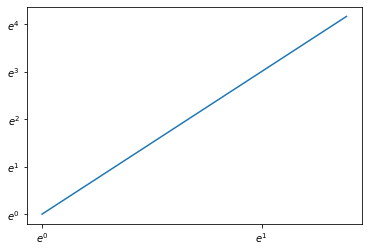

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

x = np.linspace(1, 4, 1000)

y = x**3

fig, ax = plt.subplots()

ax.loglog(x,y, basex=np.e, basey=np.e)

def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))

ax.xaxis.set_major_formatter(mtick.FuncFormatter(ticks))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(ticks))

plt.show()